In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import itertools
from collections import deque
import re

### Day 1

In [6]:
nums = [0]
with open("Day1.txt") as file:
    for line in file:
        if line == '\n':
            nums.append(0)
        else:
            nums[-1] += int(line)
print('Part 1: ' + str(max(nums)))
nums.sort(reverse=True)
print('Part 2: ' + str(sum(nums[:3])))

Part 1: 70116
Part 2: 206582


### Day 2

In [7]:
def parse(input):
    if input in ['A', 'X']: output = 1
    elif input in ['B', 'Y']: output = 2
    elif input in ['C', 'Z']: output = 3
    return output

score1 = 0
score2 = 0
with open("Day2.txt") as file: 
    for line in file:
        you = parse(line[0])
        me = parse(line[2])
        # Part 1
        score1 += me
        if me == you: score1 += 3
        elif me == you+1 or (me == 1 and you == 3): score1 += 6
        # Part 2
        if me == 1:
            score2 += you-1
            if you == 1: score2 += 3
        elif me == 2:
            score2 += you+3
        elif me == 3:
            score2 += you+7
            if you == 3: score2 -= 3        
print('Part 1: ' + str(score1))
print('Part 2: ' + str(score2))

Part 1: 10941
Part 2: 13071


### Day 3

In [8]:
def parse(input):
    output = ord(input)-96
    if output < 0: output = output+58
    return output

items = []
sum1 = 0
sum2 = 0
with open("Day3.txt") as file: 
    for line in file:
        line = line.strip('\n')
        items.append([parse(item) for item in line])
        # Part 1
        for item in items[-1][:int(len(line)/2)]:
            if item in items[-1][int(len(line)/2):]:
                sum1 += item
                break
        # Part 2
        if len(items) == 3:
            for item in items[0]:
                if item in items[1] and item in items[2]:
                    sum2 += item
                    break
            items = []        
print('Part 1: ' + str(sum1))
print('Part 2: ' + str(sum2))


Part 1: 7701
Part 2: 2644


### Day 4

In [9]:
counter1 = 0
counter2 = 0
with open("Day4.txt") as file: 
    for line in file:
        bounds = [[int(bound) for bound in section.split('-')] \
            for section in line.split(',')]
        cond = False
        for i in range(2):
            if bounds[i][0] <= bounds[(i+1)%2][0]:
                if bounds[i][1] >= bounds[(i+1)%2][1]:
                    counter1 += 1
                    cond = True
                    break
                elif bounds[i][1] >= bounds[(i+1)%2][0]:
                    cond = True
            elif bounds[i][0] <= bounds[(i+1)%2][1] and \
                bounds[i][1] >= bounds[(i+1)%2][1]:
                cond = True
        if cond: counter2 += 1
print('Part 1: ' + str(counter1))
print('Part 2: ' + str(counter2))

Part 1: 462
Part 2: 835


### Day 5

In [10]:
def read(line, stacks1, stacks2):
    index = 0
    while index < len(line):
        if line[index] == '[':
            for stack in [stacks1, stacks2]:
                stack[int(index/4)].insert(0, line[index+1]) 
        index += 4

def move(line, stacks1, stacks2):
    line = line.split('move ')[1]
    num = int(line.split(' from ')[0])
    line = line.split(' from ')[1]
    fro, to = [int(chars) for chars in line.split(' to ')]
    while num > 0:
        stacks1[to-1].append(stacks1[fro-1][-1])
        stacks2[to-1].append(stacks2[fro-1][-num])
        stacks1[fro-1].pop()
        stacks2[fro-1].pop(-num)
        num -= 1   

firstLine = True
with open("Day5.txt") as file:
    for line in file:
        if firstLine:
            stacks1 = [[] for i in range(int(len(line)/4))]
            stacks2 = [[] for i in range(int(len(line)/4))]
            firstLine = False
        if all(char in [' ', '\n'] for char in line) or line[1] == '1':
            continue
        elif line[0] == 'm':
            move(line, stacks1, stacks2)
        else:
            read(line, stacks1, stacks2)

solution = ''
for stack in stacks1:
    solution += stack[-1]
print('Part 1: ' + solution)
solution = ''
for stack in stacks2:
    solution += stack[-1]
print('Part 2: ' + solution)


Part 1: GFTNRBZPF
Part 2: VRQWPDSGP


### Day 6

In [11]:
with open("Day6.txt") as file:
    for line in file:
        for part in [0, 1]:
            pos = 3+10*part
            while True:
                segment = line[pos-(3+10*part):pos+1]
                if len(set(segment)) == len(segment):
                    print('Part %i: ' % (part+1) + str(pos+1))
                    break
                pos += 1

Part 1: 1909
Part 2: 3380


### Day 7

In [12]:
path = ""
dirSizes = {}
with open("Day7.txt") as file:
    for line in file:
        if line[0:3] == "$ c":
            dir = line.split("$ cd ")[1].strip("\n")
            if dir == "..":
                oldPath = path
                path = oldPath.rsplit("/", 2)[0] + "/"
                if path not in dirSizes.keys():
                    dirSizes[path] = dirSizes[oldPath]
                else:
                    dirSizes[path] += dirSizes[oldPath]
            else:
                path += dir + "/"
        else:
            if line[0] == "$" or line[0] == "d":
                continue
            else:
                size = int("".join(char for char in line if char.isdigit()))
                if path not in dirSizes.keys():
                    dirSizes[path] = size
                else:
                    dirSizes[path] += size

sum = 0
needed = 30000000-(70000000-dirSizes["//"])
found = dirSizes["//"]
for dirSize in dirSizes.values():
    if dirSize <= 100000: sum += dirSize
    if dirSize >= needed and dirSize < found: found = dirSize
print("Part 1: " + str(sum))
print("Part 2: " + str(found))

        

Part 1: 1581595
Part 2: 1544176


### Day 8

In [13]:
def calcScore(tree, i, segment, score):
    if i%2 == 0: segment = reversed(list(segment))
    for thisTree in segment:
        score[i] += 1
        if thisTree >= tree: break

grid = []
with open("Day8.txt") as file:
    for line in file:
        grid.append([])
        for char in line.strip():
            grid[-1].append(int(char))
grid = np.asarray(grid)
counter = 0
scores = np.zeros(tuple(grid.shape))
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        score = np.zeros(4)
        segments = [grid[:i, j], grid[i+1:, j], grid[i, :j], grid[i, j+1:]]
        if any(all(tree < grid[i, j] for tree in segment) for segment in segments): counter += 1
        for k, segment in enumerate(segments):
            calcScore(grid[i, j], k, segment, score)
        scores[i, j] = np.prod(score)
print("Part 1: " + str(counter))
print("Part 2: " + str(int(np.amax(scores))))
        


Part 1: 1787
Part 2: 440640


### Day 9

In [14]:
def checkPosTail(posTail, posHead):
    posTail = list(posTail)
    if posHead[0] == posTail[0] and posHead[1] > posTail[1]+1:
        posTail[1] += 1
    elif posHead[0] == posTail[0] and posHead[1] < posTail[1]-1:
        posTail[1] -= 1
    elif posHead[1] == posTail[1] and posHead[0] > posTail[0]+1:
        posTail[0] += 1
    elif posHead[1] == posTail[1] and posHead[0] < posTail[0]-1:
        posTail[0] -= 1
    elif (posHead[0] >= posTail[0]+1 and posHead[1] > posTail[1]+1) \
        or (posHead[1] >= posTail[1]+1 and posHead[0] > posTail[0]+1):
        posTail[0] += 1
        posTail[1] += 1
    elif (posHead[0] <= posTail[0]-1 and posHead[1] > posTail[1]+1) \
        or (posHead[1] >= posTail[1]+1 and posHead[0] < posTail[0]-1):
        posTail[0] -= 1
        posTail[1] += 1
    elif (posHead[0] >= posTail[0]+1 and posHead[1] < posTail[1]-1) \
        or (posHead[1] <= posTail[1]-1 and posHead[0] > posTail[0]+1):
        posTail[0] += 1
        posTail[1] -= 1
    elif (posHead[0] <= posTail[0]-1 and posHead[1] < posTail[1]-1) \
        or (posHead[1] <= posTail[1]-1 and posHead[0] < posTail[0]-1):
        posTail[0] -= 1
        posTail[1] -= 1
    return tuple(posTail)

def moveRope(length):
    poses = [(0, 0) for i in range(length)]
    posesTail = []
    with open("Day9.txt") as file:
        for line in file:
            dir, steps = line.strip().split(' ')
            for i in range(int(steps)):
                posHead = list(poses[0])
                if dir == 'R':
                    posHead[0] += 1
                elif dir == 'L':
                    posHead[0] -= 1
                elif dir == 'U':
                    posHead[1] += 1
                elif dir == 'D':
                    posHead[1] -= 1
                poses[0] = tuple(posHead)
                for j in range(1, length):
                    poses[j] = checkPosTail(poses[j], poses[j-1])
                if poses[length-1] not in posesTail:
                    posesTail.append(poses[length-1])
    return str(len(posesTail))

print("Part 1: " + moveRope(2))
print("Part 2: " + moveRope(10))

            

Part 1: 5513
Part 2: 2427


### Day 10

Part 1: 14160


Text(0.5, 1.0, 'Part 2')

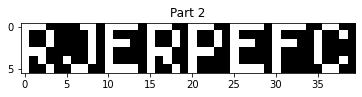

In [15]:
cycle = 0
X = 1

cycles = np.linspace(20, 220, num=6, dtype=int)
sum = 0

def part1(sum, cycle, X):
    if cycle in cycles: sum += cycle*X
    return sum

CRT = np.zeros((6, 40))

def part2(CRT, cycle, X):
    if cycle%40 in [X-1, X, X+1]: CRT[cycle//40, cycle%40] = 1
    return CRT
    
with open("Day10.txt") as file:
    for line in file:
        if line[0] == "n":
            CRT = part2(CRT, cycle, X)
            cycle += 1
            sum = part1(sum, cycle, X)
        elif line[0] == "a":
            for i in range(2):
                CRT = part2(CRT, cycle, X)
                cycle += 1
                sum = part1(sum, cycle, X)
            X += int(line.split("addx ")[1].strip("\n"))
print("Part 1: " + str(sum))
cmapbw = ListedColormap(['k', 'w'], N=2)
plt.imshow(CRT, cmap=cmapbw, vmin=0, vmax=1)
plt.title("Part 2")

### Day 11

In [16]:
def readFile():
    monkeys = []
    items = {}
    operation = {}
    test = {}
    with open("Day11.txt") as file:
        for line in file:
            line = line.strip()
            if line == "":
                continue
            if line[0] == "M":
                monkeys.append(int("".join(char for char in line if char.isdigit())))
            elif line[0] == "S":
                startItems = line.split("Starting items: ")[1].split(", ")
                items[monkeys[-1]] = [int(item) for item in startItems]
            elif line[0] == "O":
                if "*" in line:
                    operation[monkeys[-1]] = ["*"]
                elif "+" in line:
                    operation[monkeys[-1]] = ["+"]
                inte = "".join(char for char in line if char.isdigit())
                if len(inte) == 0:
                    operation[monkeys[-1]].append(-1)
                else:
                    operation[monkeys[-1]].append(int(inte))
            elif line[0] == "T":
                test[monkeys[-1]] = [int("".join(char for char in line if char.isdigit()))]
            else:
                test[monkeys[-1]].append(int("".join(char for char in line if char.isdigit())))
    return monkeys, items, operation, test

def monkeyinthemiddle(part, numRounds):
    monkeys, items, operation, test = readFile()
    inspects = {}
    for monkey in monkeys:
        inspects[monkey] = 0
    if part == 2:
        prod = np.prod([value[0] for value in test.values()])
    for i in range(numRounds):
        for monkey in monkeys:
            for item in items[monkey]:
                inspects[monkey] += 1
                if operation[monkey][0] == "*":
                    if operation[monkey][1] == -1:
                        fear = item * item
                    else:
                        fear = item * operation[monkey][1]
                elif operation[monkey][0] == "+":
                    if operation[monkey][1] == -1:
                        fear = item + item
                    else:
                        fear = item + operation[monkey][1]
                if part == 1:
                    fear //= 3
                elif part == 2:
                    fear %= prod
                if fear%test[monkey][0] == 0:
                    items[test[monkey][1]].append(fear)
                else:
                    items[test[monkey][2]].append(fear)
            items[monkey] = []     
    return str(np.prod(sorted(inspects.values())[-2:]))   
 
print("Part 1: " + monkeyinthemiddle(1, 20))
print("Part 2: " + monkeyinthemiddle(2, 10000))

Part 1: 78678
Part 2: 15333249714


### Day 12

In [17]:
map = []
with open("Day12.txt") as file:
    for i, line in enumerate(file):
        map.append([])
        for j, char in enumerate(line.strip()):
            if char == "S":
                map[-1].append(1)
                start = (i, j)
            elif char == "E":
                map[-1].append(26)
                end = (i, j)
            else:
                map[-1].append(ord(char)-96)

map = np.asarray(map)
steps1 = np.zeros(map.shape)
steps2 = np.zeros(map.shape)
queue = [start]
visited = []
done = False
while True:
    thisPos = queue[0]
    poses = []
    for i in [thisPos[0]-1, thisPos[0]+1]:
        if i >= 0 and i <= map.shape[0]-1: poses.append((i, thisPos[1]))
    for i in [thisPos[1]-1, thisPos[1]+1]:
        if i >= 0 and i <= map.shape[1]-1: poses.append((thisPos[0], i))
    for pos in poses:
        if pos not in visited:
            if map[pos] <= map[thisPos]+1:
                steps1[pos] = steps1[thisPos]+1
                if map[pos] == 1:
                    steps2[pos] = 0
                else:
                    steps2[pos] = steps2[thisPos]+1
                if pos == end:
                    print("Part 1: " + str(int(steps1[pos])))
                    print("Part 2: " + str(int(steps2[pos])))
                    done = True
                    break
                queue.append(pos)
                visited.append(pos)
    queue.pop(0)
    if done == True: break

        

Part 1: 472
Part 2: 465


### Day 13

In [329]:
def compare(l, r):
    if isinstance(l, int) and isinstance(r, int):
        if l < r:
            return True
        elif l > r:
            return False
        else:
            return None

    elif isinstance(l, list) and isinstance(r, list):
        for li, ri in zip(l, r):
            result = compare(li, ri)
            if result != None:
                return result
        if len(l) < len(r):
            return True
        elif len(l) > len(r):
            return False
        else:
            return None

    elif isinstance(l, list) and isinstance(r, int):
        result = compare(l, [r])
        if result != None:
            return result

    
    elif isinstance(l, int) and isinstance(r, list):
        result = compare([l], r)
        if result != None:
            return result

def part1(filename):
    indices = []
    i = 1
    with open(filename) as file:
        for line in file:
            if i%3 == 1:
                left = eval(line.strip())
            elif i%3 == 2:
                right = eval(line.strip())
            else:
                if compare(left, right): indices.append(i//3)
            i += 1
    return str(sum(indices))

def part2(filename):
    order = [1, 2]
    lists = {1: [[2]], 2: [[6]]}
    index = 3
    with open(filename) as file:
        for line in file:
            if line == "\n":
                continue
            line = eval(line.strip())
            lists[index] = line
            for i, ind in enumerate(order):
                if compare(line, lists[ind]):
                    order.insert(i, index)
                    break
            if index not in order: order.append(index)
            index += 1
    return str(np.prod([i+1 for i, ind in enumerate(order) if ind == 1 or ind == 2]))

print("Part 1: " + part1("Day13.txt"))
print("Part 2: " + part2("Day13.txt"))
    
    

Part 1: 6187
Part 2: 23520


### Day 14

In [330]:
def readData(filename):
    blocked = set()
    with open(filename) as file:
        for line in file:
            line = line.strip().split(" -> ")
            rocks = [eval("(" + coords + ")") for coords in line]
            for left, right in zip(rocks, rocks[1:]):
                if left[0] == right[0]:
                    coords = np.linspace(min(left[1], right[1]), max(left[1], right[1]),
                        num=abs(left[1]-right[1])+1, dtype=int)
                    blocked.update((left[0], coord) for coord in coords if (left[0], coord) not in blocked)
                elif left[1] == right[1]:
                    coords = np.linspace(min(left[0], right[0]), max(left[0], right[0]),
                        num=abs(left[0]-right[0])+1, dtype=int)
                    blocked.update((coord, left[1]) for coord in coords if (coord, left[1]) not in blocked)
    maxY = max(y for x, y in blocked)
    return blocked, maxY

def part1(filename):
    blocked, maxY = readData(filename)
    for i in itertools.count():
        sandX = 500
        sandY = 0
        while True:
            moved = False
            for newSand in [(sandX, sandY+1), (sandX-1, sandY+1), (sandX+1, sandY+1)]:
                if newSand not in blocked:
                    sandX, sandY = newSand
                    moved = True
                    break
            if not moved:
                blocked.add((sandX, sandY))
                break
            if sandY == maxY:
                return str(i)

def part2(filename):
    blocked, maxY = readData(filename)
    for i in itertools.count():
        sandX = 500
        sandY = 0
        while True:
            moved = False
            for newSand in [(sandX, sandY+1), (sandX-1, sandY+1), (sandX+1, sandY+1)]:
                if newSand not in blocked and newSand[1] <= maxY+1:
                    sandX, sandY = newSand
                    moved = True
                    break
            if not moved:
                if sandX == 500 and sandY == 0:
                    return str(i+1)
                blocked.add((sandX, sandY))
                break

print("Part 1: " + part1("Day14.txt"))
print("Part 2: " + part2("Day14.txt"))


Part 1: 897
Part 2: 26683


### Day 15

In [28]:
def readData(filename, part):
    beacons = []
    sensors = []
    manhattanDists = []
    xMin = np.Inf
    xMax = 0
    with open(filename) as file:
        for line in file:
            line = line.split("Sensor at x=")[1]
            sensorX, line = line.split(", y=", 1)
            sensorY, line = line.split(": closest beacon is at x=")
            beaconX, line = line.split(", y=")
            beaconY = line.strip()
            sensorX, sensorY, beaconX, beaconY = [int(coord) for coord in [sensorX, sensorY, beaconX, beaconY]]
            sensors.append((sensorX, sensorY))
            manhattanDists.append(abs(sensorX-beaconX)+abs(sensorY-beaconY))
            if sensorX-manhattanDists[-1] < xMin: xMin = sensorX-manhattanDists[-1]
            if sensorX+manhattanDists[-1] > xMax: xMax = sensorX+manhattanDists[-1]
    if part == "1":
        return sensors, beacons, manhattanDists, xMin, xMax
    elif part == "2":
        return sensors, beacons, manhattanDists

def part1(filename, y):
    sensors, beacons, manhattanDists, xMin, xMax = readData(filename, "1")
    counter = 0
    for x in range(xMin, xMax+1):
        if (x, y) not in sensors and (x, y) not in beacons:
            for i, (sensorX, sensorY) in enumerate(sensors):
                if manhattanDists[i]-abs(sensorY-y)-abs(sensorX-x) >= 0:
                        counter += 1
                        break
    return str(counter)

def part2(filename, maxCoord):
    sensors, beacons, manhattanDists = readData(filename, "2")
    for y in range(0, maxCoord+1):
        intervalsX = []
        for i, (sensorX, sensorY) in enumerate(sensors):
            manhattanDist = manhattanDists[i]-abs(sensorY-y)
            if manhattanDist >= 0:
                intervalsX.append((sensorX-manhattanDist, sensorX+manhattanDist))
        intervalsX.sort()
        maxX = 0
        for leftX, rightX in intervalsX:
            if leftX-1 > maxX: return str((maxX+1)*4000000+y)
            if rightX > maxX: maxX = rightX

print("Part 1: " + part1("Day15.txt", 2000000))
print("Part 2: " + part2("Day15.txt", 4000000))



Part 1: 5240819
Part 2: 13213086906101


### Day 16

In [78]:
def calcNumSteps(start, end, neighbours):
    steps = {}
    for pos in neighbours.keys():
        steps[pos] = np.inf
    steps[start] = 0
    queue = [start]
    visited = []
    done = False
    while len(queue) > 0:
        thisPos = queue[0]
        poses = neighbours[thisPos]
        for pos in poses:
            if steps[thisPos]+1 < steps[pos]:
                steps[pos] = steps[thisPos]+1
            if pos not in visited: queue.append(pos)
        visited.append(thisPos)
        queue.pop(0)
    return(steps[end])

def readData(filename):
    valves = []
    presRates = {}
    neighbours = {}
    numSteps = {}
    with open(filename) as file:
        for line in file:
                line = line.split("Valve ")[1]
                valve, line = line.split(" has flow rate=")
                valves.append(valve)
                if "tunnels" in line:
                    presRate, line = line.split("; tunnels lead to valves ")
                else:
                    presRate, line = line.split("; tunnel leads to valve ")
                presRates[valve] = int(presRate)
                neighbours[valve] = [neighbour for neighbour in line.strip().split(", ")]
    for numValve, thisValve in enumerate(valves):
        for valve in valves[numValve+1:]:
            numStep = calcNumSteps(thisValve, valve, neighbours)
            numSteps[thisValve + valve] = numStep
            numSteps[valve + thisValve] = numStep
    return valves, presRates, numSteps

def calcPresRateTotMaxPart1(time, valve, valves, presRates, numSteps):
    presRateTotMax = 0
    for newValve in valves:
        newTime = time-numSteps[valve + newValve]-1
        if newTime >= 0:
            presRateTot = presRates[newValve]*newTime
            newValves = [item for item in valves if item != newValve]
            presRateTot += calcPresRateTotMaxPart1(newTime, newValve, newValves, presRates, numSteps)
            presRateTotMax = max(presRateTotMax, presRateTot)
    return presRateTotMax

def part1(filename):
    valves, presRates, numSteps = readData(filename)
    closed = list(valve for valve in valves if presRates[valve] > 0)
    presRateTotMax = \
        calcPresRateTotMaxPart1(30, "AA", closed, presRates, numSteps)
    return (str(presRateTotMax))

print("Part 1: " + part1("Day16.txt"))

def calcPresRateTotMaxPart2(time, valve, valves, presRates, numSteps, switch):
    if switch:
        presRateTotMax = calcPresRateTotMaxPart2(26, "AA", valves, presRates, numSteps, False)
    else:
        presRateTotMax = 0
    for newValve in valves:
        newTime = time-numSteps[valve + newValve]-1
        if newTime >= 0:
            presRateTot = presRates[newValve]*newTime
            newValves = valves - {newValve}
            presRateTot += calcPresRateTotMaxPart2(newTime, newValve, newValves, presRates, numSteps, switch)
            presRateTotMax = max(presRateTotMax, presRateTot)
    return presRateTotMax

def part2(filename):
    valves, presRates, numSteps = readData(filename)
    closed = frozenset(valve for valve in valves if presRates[valve] > 0)
    presRateTotMax = \
        calcPresRateTotMaxPart2(26, "AA", closed, presRates, numSteps, True)
    return (str(presRateTotMax))

print("Part 2: " + part2("Day16.txt"))


Part 1: 2181
Part 2: 2824


In [327]:
def calc(filename, numRocks):
    rocks = {}
    rocks[0] = [(0, 0), (1, 0), (2, 0), (3, 0)]
    rocks[1] = [(0, 1), (1, 0), (1, 1), (1, 2), (2, 1)]
    rocks[2] = [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)]
    rocks[3] = [(0, 0), (0, 1), (0, 2), (0, 3)]
    rocks[4] = [(0, 0), (0, 1), (1, 0), (1, 1)]
    yMax = 0
    with open(filename) as file:
        windPattern = itertools.cycle(enumerate(file.readline().strip()))  
    rockInd = 1
    rock = rocks[rockInd-1]
    rock = [(x+2, y+yMax+4) for (x, y) in rock]
    blocked = set()
    blocked.update((x, 0) for x in range(7))
    memory = {}
    while rockInd <= numRocks:
        windInd, wind = next(windPattern)
        if wind == "<":
            newRock = [(x-1, y) for (x, y) in rock]
        elif wind == ">":
            newRock = [(x+1, y) for (x, y) in rock]
        if not any(coords in blocked for coords in newRock) \
            and not any(x < 0 for (x, y) in newRock) \
            and not any(x > 6 for (x, y) in newRock):
            rock = newRock
        newRock = [(x, y-1) for (x, y) in rock]
        if any(coords in blocked for coords in newRock):
            blocked.update(coords for coords in rock)
            yMaxes = tuple(max(y for (x, y) in blocked if x == thisX) for thisX in range(7))
            yMax = max(yMax, max(yMaxes))
            yMaxes = tuple(y-yMax for y in yMaxes)
            if ((rockInd-1)%5, windInd, yMaxes) in memory.keys():
                oldRockInd, oldYMax = memory[((rockInd-1)%5, windInd, yMaxes)]
                reps = (numRocks-rockInd) // (rockInd-oldRockInd)
                rockInd += (rockInd-oldRockInd)*reps
                blocked = set((x, y+(yMax-oldYMax)*reps) for (x, y) in blocked)
                yMax += (yMax-oldYMax)*reps
            else:
                memory[((rockInd-1)%5, windInd, yMaxes)] = rockInd, yMax
            rockInd += 1
            rock = rocks[(rockInd-1)%5]
            rock = [(x+2, y+yMax+4) for (x, y) in rock]
        else:
            rock = newRock
    return str(yMax)

print("Part 1: " + calc("Day17.txt", 2022))
print("Part 2: " + calc("Day17.txt", 1000000000000))


Part 1: 3173
Part 2: 1570930232582


### Day 18

In [71]:
def readData(filename):
    lavas = []
    with open(filename) as file:
        for line in file:
            lavas.append(tuple(int(lava) for lava in line.strip().split(",")))
    return lavas

def part1(filename):
    lavas = readData(filename)
    neighbours = [(0, 0, -1), (0, 0, 1), (0, -1, 0), (0, 1, 0), (-1, 0, 0), (1, 0, 0)]
    sides = 0
    for lava in lavas:
        for neighbour in neighbours:
            if tuple(l+n for l, n in zip(lava, neighbour)) not in lavas: sides += 1
    return(str(sides))

def air(start, lavas, neighbours, airs, steams):
    if start in airs:
        return True, airs, steams
    elif start in steams:
        return False, airs, steams 
    queue = [start]
    minLava = tuple(min(lava[i] for lava in lavas)-1 for i in range(3))
    maxLava = tuple(max(lava[i] for lava in lavas)+1 for i in range(3))
    visited = []
    while len(queue) > 0:
        thisPos = queue[0]
        visited.append(thisPos)
        queue.pop(0)
        poses = [tuple(p+n for p, n in zip(thisPos, neighbour)) for neighbour in neighbours]
        for pos in poses:
            if pos in airs:
                airs.update(visited)
                return True, airs, steams
            elif pos in steams or \
                any(p == l for p, l in zip(pos, minLava)) or any(p == l for p, l in zip(pos, maxLava)):
                steams.update(visited)
                return False, airs, steams
            elif pos not in lavas and pos not in visited and pos not in queue:
                queue.append(pos)
    airs.update(visited)
    return True, airs, steams

def part2(filename):
    lavas = readData(filename)
    neighbours = [(0, 0, -1), (0, 0, 1), (0, -1, 0), (0, 1, 0), (-1, 0, 0), (1, 0, 0)]
    sides = 0
    airs = set()
    steams = set()
    for i, lava in enumerate(lavas):
        for neighbour in neighbours:
            thisNeighbour = tuple(l+n for l, n in zip(lava, neighbour))
            if thisNeighbour not in lavas:
                thisAir, airs, steams =  air(thisNeighbour, lavas, neighbours, airs, steams)
                if not thisAir: sides += 1
    return(str(sides))

print("Part 1: " + part1("Day18.txt"))
print("Part 2: " + part2("Day18.txt"))



Part 1: 4348
Part 2: 2546


### Day 19

In [21]:
def readData(filename):
    blueprints = []
    with open(filename) as file:
        for line in file:
            costs = [int(cost) for cost in re.findall(r'\d+', line)[1:]]
            blueprints.append([[costs[0], 0, 0, 0], [costs[1], 0, 0, 0],
                [costs[2], costs[3], 0, 0], [costs[4], 0, costs[5], 0]])
    return blueprints

def calcGeodeMaxPart1(time, resources, robots, blueprint, costsMax):
    geodeMax = resources[-1]+time*robots[-1]
    for kind, costs in enumerate(blueprint):
        if robots[kind] >= costsMax[kind]: continue
        newTime = time
        nope = False
        for resource, cost in enumerate(costs):
            if cost > 0 and robots[resource] == 0:
                nope = True
                break
            if resources[resource] < cost:
                newTime = min(newTime,
                    time+((resources[resource]-cost)//robots[resource]))
        newTime -= 1
        if newTime > 0 and not nope:
            newRobots = robots.copy()
            newRobots[kind] += 1
            newResources = []
            for i in range(4):
                newResources.append(resources[i]-costs[i]+(time-newTime)*robots[i])
            geodeMax = max(geodeMax, calcGeodeMaxPart1(newTime,
                    newResources, newRobots, blueprint, costsMax))
    return geodeMax

def part1(filename):
    blueprints = readData(filename)
    sum = 0
    for i, blueprint in enumerate(blueprints):
        costsMax = list(max(costs[j] for costs in blueprint) for j in range(4))
        costsMax[3] = np.inf
        geodeMax = calcGeodeMaxPart1(24, [0]*4, [1, 0, 0, 0], blueprint, costsMax)
        sum += (i+1)*geodeMax
    return str(sum)

def calcGeodeMaxPart2(time, resources, robots, blueprint, costsMax):
    geodeMax = resources[-1]+time*robots[-1]
    for kind, costs in enumerate(blueprint):
        if robots[kind] >= costsMax[kind]: continue
        if time <= 8 and kind < 2: continue
        newTime = time
        nope = False
        for resource, cost in enumerate(costs):
            if cost > 0 and robots[resource] == 0:
                nope = True
                break
            if resources[resource] < cost:
                newTime = min(newTime,
                    time+((resources[resource]-cost)//robots[resource]))
        newTime -= 1
        if newTime > 0 and not nope:
            newRobots = robots.copy()
            newRobots[kind] += 1
            newResources = []
            for i in range(4):
                newResources.append(resources[i]-costs[i]+(time-newTime)*robots[i])
            geodeMax = max(geodeMax, calcGeodeMaxPart2(newTime,
                    newResources, newRobots, blueprint, costsMax))
    return geodeMax

def part2(filename):
    blueprints = readData(filename)
    sum = 1
    for blueprint in blueprints[:3]:
        costsMax = list(max(costs[j] for costs in blueprint) for j in range(4))
        costsMax[3] = np.inf
        geodeMax = calcGeodeMaxPart2(32, [0]*4, [1, 0, 0, 0], blueprint, costsMax)
        sum *= geodeMax
    return str(sum)

print("Part 1: " + part1("Day19.txt"))
print("Part 2: " + part2("Day19.txt"))

Part 1: 1480
Part 2: 3168


### Day 20

In [174]:
def readData(filename):
    nums = []
    with open(filename) as file:
        for i, line in enumerate(file):
            num = int(line.strip())
            nums.append((i, num))
            if num == 0: zero = nums[-1]
    return nums, zero

def part1(filename):
    initNums, zero = readData(filename)
    nums = deque()
    for num in initNums:
        nums.append(num)
    for num in initNums:
        nums.rotate(-nums.index(num))
        nums.popleft()
        nums.rotate(-num[1])
        nums.appendleft(num)
    nums.rotate(-nums.index(zero))
    return str(np.sum([nums[(i*1000)%len(nums)][1] for i in range(1,4)]))

def part2(filename):
    initNums, zero = readData(filename)
    nums = deque()
    for i, num in enumerate(initNums):
        initNums[i] = (num[0], num[1]*811589153)
        nums.append(initNums[i])
    for i in range(10):
        for num in initNums:
            nums.rotate(-nums.index(num))
            nums.popleft()
            nums.rotate(-num[1])
            nums.appendleft(num)
    nums.rotate(-nums.index(zero))
    return str(np.sum([nums[(i*1000)%len(nums)][1] for i in range(1,4)]))

print("Part 1: " + part1("Day20.txt"))
print("Part 2: " + part2("Day20.txt"))

Part 1: 13289
Part 2: 2865721299243


### Day 21

In [25]:
def readData(filename):
    monkeys = {}
    with open(filename) as file:
        for line in file:
            name, line = line.strip().split(": ")
            if line.isdigit():
                monkeys[name] = int(line)
            else:
                monkeys[name] = [line[:4], line[7:], line[5]]
    return monkeys

def shouting(monkeys, monkey):
    if isinstance(monkeys[monkey], int):
        return monkeys[monkey]
    else:
        monkeyOne = shouting(monkeys, monkeys[monkey][0])
        monkeyTwo = shouting(monkeys, monkeys[monkey][1])
        return eval(str(monkeyOne) + monkeys[monkey][2] + str(monkeyTwo))

def part1(filename):
    monkeys = readData(filename)
    return shouting(monkeys, "root")

def part2(filename, guess):
    monkeys = readData(filename)
    monkeys.pop("humn")
    monkeys["root"][2] = "=="
    for humn in itertools.count(guess):
        monkeys["humn"] = humn
        if shouting(monkeys, "root"):
            return str(humn)
        monkeys.pop("humn")

print("Part 1: " + str(int(part1("Day21.txt"))))
print("Part 2: " + part2("Day21.txt", 3715799488100))


Part 1: 331319379445180
Part 2: 3715799488132


### Day 22

In [46]:
def readData(filename):
    walls = set()
    tiles = set()
    start = (-1, -1)
    with open(filename) as file:
        for i, line in enumerate(file):
            if line == "\n":
                continue
            elif line[0] in [" ", ".", "#"]:
                for j, char in enumerate(line.strip("\n")):
                    if char == " ":
                        continue
                    elif char == "#":
                        walls.add((j, i))
                    elif char == ".":
                        if start == (-1, -1): start = (j, i)
                        tiles.add((j, i))
            else:
                line = line.strip("\n")
                rls = [char for char in line if char in ["R", "L"]]
                instructs = line.replace("R", " ").replace("L", " ").split()
                lastInstruct = instructs[-1]
                instructs = list(np.array([[instruct, rl] for instruct, rl in zip(instructs, rls)]).ravel()) 
                instructs.append(lastInstruct) 
    return start, instructs, tiles, walls

def part1(filename):
    start, instructs, tiles, walls = readData(filename)
    board = tiles.union(walls)
    pos = start
    dirs = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    dirIndex = 0
    for instruct in instructs:
        if instruct.isdigit():
            for i in range(int(instruct)):
                newPos = tuple(p + d for p, d in zip(pos, dirs[dirIndex]))
                if newPos in walls:
                    break
                elif newPos not in tiles:
                    if dirIndex == 0:
                        newPos = (min(x for x, y in board if y == pos[1]), pos[1])
                    elif dirIndex == 1:
                        newPos = (pos[0], min(y for x, y in board if x == pos[0]))                        
                    elif dirIndex == 2:
                        newPos = (max(x for x, y in board if y == pos[1]), pos[1])
                    elif dirIndex == 3:
                        newPos = (pos[0], max(y for x, y in board if x == pos[0]))
                    if newPos in walls:
                       break
                pos = newPos
        elif instruct in ["R", "L"]:
            if instruct == "R":
                dirIndex += 1
                if dirIndex == 4: dirIndex = 0
            else:
                dirIndex -= 1
                if dirIndex == -1: dirIndex = 3
    return str(1000*(pos[1]+1)+4*(pos[0]+1)+dirIndex)

def neighbour(pos, dirIndex):
    if pos[0] == -1:
        if pos[1] <= 149:
            newPos = (50, 149-pos[1])
            dirIndex = 0
        elif pos[1] <= 199:
            newPos = (pos[1]-100, 0)
            dirIndex = 1
    elif pos[0] < 49:
        if pos[1] == 99:
            newPos = (50, pos[0]+50)
            dirIndex = 0
        elif pos[1] == 200:
            newPos = (pos[0]+100, 0)
    elif pos[0] == 49:
        if pos[1] <= 49:
            newPos = (0, 149-pos[1])
            dirIndex = 0
        elif pos[1] < 99:
            newPos = (pos[1]-50, 100)
            dirIndex = 1
        elif pos[1] == 99:
            if dirIndex == 3:
                newPos = (50, 99)
                dirIndex = 0
            elif dirIndex == 2:
                newPos = (49, 100)
                dirIndex = 1
        elif pos[1] == 200:
            newPos = (149, 0)
    elif pos[0] == 50:
        if pos[1] == -1:
            newPos = (0, 150)
            dirIndex = 0
        elif pos[1] == 150:
            if dirIndex == 1:
                newPos = (49, 150)
                dirIndex = 2
            elif dirIndex == 0:
                newPos = (50, 149)
                dirIndex = 3
        elif pos[1] > 150:
            newPos = (pos[1]-100, 149)
            dirIndex = 3
    elif pos[0] < 100:
        if pos[1] == -1:
            newPos = (0, pos[0]+100)
            dirIndex = 0
        elif pos[1] == 150:
            newPos = (49, pos[0]+100)
            dirIndex = 2
    elif pos[0] == 100:
        if pos[1] == -1:
            newPos = (0, 199)
        elif pos[1] == 50:
            if dirIndex == 1:
                newPos = (99, 50)
                dirIndex = 2
            elif dirIndex == 0:
                newPos = (100, 49)
                dirIndex = 3
        elif pos[1] <= 99:
            newPos = (pos[1]+50, 49)
            dirIndex = 3
        elif pos[1] <= 149:
            newPos = (149, 149-pos[1])
            dirIndex = 2
    elif pos[0] <= 149:
        if pos[1] == -1:
            newPos = (pos[0]-100, 199)
        elif pos[1] == 50:
            newPos = (99, pos[0]-50)
            dirIndex = 2
    elif pos[0] == 150:
        newPos = (99, 149-pos[1])
        dirIndex = 2
    return newPos, dirIndex

def part2(filename):
    start, instructs, tiles, walls = readData(filename)
    board = tiles.union(walls)
    pos = start
    dirs = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    dirIndex = 0
    for instruct in instructs:
        if instruct.isdigit():
            for i in range(int(instruct)):
                newPos = tuple(p + d for p, d in zip(pos, dirs[dirIndex]))
                if newPos in walls:
                    break
                elif newPos not in tiles:
                    newPos, newDirIndex = neighbour(newPos, dirIndex)
                    if newPos in walls:
                       break
                    dirIndex = newDirIndex
                pos = newPos
        elif instruct in ["R", "L"]:
            if instruct == "R":
                dirIndex += 1
                if dirIndex == 4: dirIndex = 0
            else:
                dirIndex -= 1
                if dirIndex == -1: dirIndex = 3
    return str(1000*(pos[1]+1)+4*(pos[0]+1)+dirIndex)

print("Part 1: " + part1("Day22.txt"))
print("Part 2: " + part2("Day22.txt"))

Part 1: 65368
Part 2: 156166


### Day 23

In [298]:
def readData(filename):
    elves = []
    with open(filename) as file:
        for i, line in enumerate(file):
            for j, char in enumerate(line):
                if char == "#":
                    elves.append((j, i))
    return elves

def day23(filename):
    elves = readData(filename)
    dirs = [(0, -1), (0, 1), (-1, 0), (1, 0)]
    dirInd = 0
    nbours = {}
    nbours[0] = [(-1, -1), (0, -1), (1, -1)]
    nbours[1] = [(-1, 1), (0, 1), (1, 1)]
    nbours[2] = [(-1, -1), (-1, 0), (-1, 1)]
    nbours[3] = [(1, -1), (1, 0), (1, 1)]
    allNbours = set(nbours[0] + nbours[1] + nbours[2] + nbours[3])
    for counter in itertools.count():
        newElves = {}
        for i, elf in enumerate(elves):
            if any(tuple(e+n for e, n in zip(elf, nbour)) in elves for nbour in allNbours):
                for j in range(4):
                    if all(tuple(e+n for e, n in zip(elf, nbour)) not in elves for nbour in nbours[(dirInd+j)%4]):
                        pos = tuple(e+d for e, d in zip(elf, dirs[(dirInd+j)%4]))
                        if pos not in newElves:
                            newElves[pos] = i
                        else:
                            newElves[pos] = -1
                        break
        if counter == 10: 
            xMin = min(x for x, y in elves)
            xMax = max(x for x, y in elves)
            yMin = min(y for x, y in elves)
            yMax = max(y for x, y in elves)
            print("Part 1: " + str((xMax-xMin+1)*(yMax-yMin+1)-len(elves)))
        if len(newElves) == 0: break
        for key, value in newElves.items():
            if value >= 0:
                elves[value] = key
        dirInd = (dirInd+1)%4
    print("Part 2: " + str(counter+1))

day23("Day23.txt")

Part 1: 4052
Part 2: 978


### Day 24

In [40]:
def readData(filename):
    dirs = {'>': (1, 0), '<': (-1, 0), 'v': (0, 1), '^': (0, -1)}
    blizzards = []
    dirsBlizzards = []
    with open(filename) as file:
        for i, line in enumerate(file):
            for j, char in enumerate(line):
                if i == 0 and char == '\n':
                    xMax = j-1
                elif line[1] == '#':
                    yMax = i
                elif char in dirs.keys():
                    blizzards.append((j, i))
                    dirsBlizzards.append(dirs[char])
    return blizzards, dirsBlizzards, xMax, yMax

def journey(blizzards, dirsBlizzards, start, end, xMax, yMax):
    dirs = [(0, 0), (1, 0), (-1, 0), (0, 1), (0, -1)]
    poses = [start]
    for step in itertools.count():
        for i, blizzard in enumerate(blizzards):
            x, y = tuple(b+d for b, d in zip(blizzard, dirsBlizzards[i]))
            if x == 0:
                x = xMax-1
            elif x == xMax:
                x = 1
            if y == 0:
                y = yMax-1
            elif y == yMax:
                y = 1
            blizzards[i] = (x, y)
        blizzardsNow = set(blizzards)
        newPoses = set()
        for pos in poses:
            for dir in dirs:
                x, y = tuple(p+d for p, d in zip(pos, dir))
                if (x, y) == end: return(step+1, blizzards)
                if (x, y) == start or (x > 0 and x < xMax and y > 0 and y < yMax and \
                    (x, y) not in blizzardsNow):
                    newPoses.add((x, y))
        poses = newPoses.copy()           

blizzards, dirsBlizzards, xMax, yMax = readData('Day24.txt')
steps, blizzards = journey(blizzards, dirsBlizzards, (1, 0), (xMax-1, yMax), xMax, yMax)
print('Part 1: ' + str(steps))
newSteps, blizzards = journey(blizzards, dirsBlizzards, (xMax-1, yMax), (1, 0), xMax, yMax)
steps += newSteps
newSteps, blizzards = journey(blizzards, dirsBlizzards, (1, 0), (xMax-1, yMax), xMax, yMax)
steps += newSteps
print('Part 2: ' + str(steps))
            

Part 1: 260
Part 2: 747


### Day 25

In [266]:
def part1(filename):
    sum = 0
    iMax = 0
    with open(filename) as file:
        for line in file:
            for i, char in enumerate(line.strip()[::-1]):
                if char.isdigit():
                    sum += int(char)*(5**i)
                elif char == "-":
                    sum -= 5**i
                elif char == "=":
                    sum -= 2*(5**i)
                if i > iMax: iMax = i
    
    fact = 5**(iMax+1)
    charSum = ""
    while fact >= 1:
        num = int(sum//fact)
        sum -= num*fact
        charSum += str(num)
        fact /= 5
    
    ans = ""
    overflow = False
    for char in charSum[::-1]:
        if overflow:
            thisChar = str(int(char)+1)
        else:
            thisChar = char
        if thisChar == "3":
            ans += "="
            overflow = True
        elif thisChar == "4":
            ans += "-"
            overflow = True
        elif thisChar == "5":
            ans += "0"
            overflow = True
        else:
            ans += thisChar
            overflow = False

    return str(ans[::-1])
    
print("Part 1: " + part1("Day25.txt"))

Part 1: 122-0==-=211==-2-200
